<a href="https://colab.research.google.com/github/magasbakary01/covid_TB/blob/main/nlp_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated Scientific Literature Review Pipeline

## Problem
Conducting a comprehensive thorough scientific literature review is a critical aspect of many research projects.
However, the process can be time-consuming, repetitive, and prone to human error. This project aims to
develop an automated pipeline that streamlines the process of conducting a literature review, making it more
efficient and reliable.

In [ ]:
# Installation of necessary library

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import collections


2023-03-05 13:15:36 4d61f8703783 numexpr.utils[166] INFO NumExpr defaulting to 2 threads.


## Data collection : automatically gathering relevant articles from academic databases and other sources using web scraping techniques or APIs.

In [ ]:
#initialise the keyword to be searched and number of articles to be retrieved
!pip install metapub
import metapub
keyword="tuberculosis AND Covid-19"
num_of_articles=50
from metapub import PubMedFetcher
fetch = PubMedFetcher()

# get the  PMID for first 3 articles with keyword sepsis
pmids = fetch.pmids_for_query(keyword, retmax=num_of_articles)

# get  articles
articles = {}
for pmid in pmids:
    articles[pmid] = fetch.article_by_pmid(pmid)
# get title for each article:
titles = {}
for pmid in pmids:
    titles[pmid] = fetch.article_by_pmid(pmid).title
Title = pd.DataFrame(list(titles.items()),columns = ['pmid','Title'])
print(Title)
# get abstract for each article:
abstracts = {}
for pmid in pmids:
    abstracts[pmid] = fetch.article_by_pmid(pmid).abstract
df = pd.DataFrame(list(abstracts.items()),columns = ['pmid','Abstract'])

print(df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
        pmid                                              Title
0   36867924  An insight overview on COVID-19 mRNA vaccines:...
1   36867620  Diagnostic performance of GENEDIA W and Active...
2   36865825  COVID-19 and Mucormycosis: A Black Fungus Disa...
3   36857806  Immune evasion of severe acute respiratory syn...
4   36855103  The clinical and epidemiological characteristi...
5   36853105                             Literature Highlights.
6   36851348  Neutralization Effect of Sera against Delta an...
7   36849838  The safety and immunogenicity of inactivated C...
8   36845790  Observational findings of transbronchial lung ...
9   36845786  Activation of tuberculosis in recovered COVID-...
10  36845104  Editorial: Research advances of tuberculosis v...
11  31644151                              Monoclonal Antibodies
12  36842039                                 The diabetic lung.
13  3

## Processing : The pipeline will use NLP techniques to pre-process the text data and extract relevant information, mainly from the abstract.

In [ ]:
import string
df['Abstract']=df['Abstract'].astype(str)
df['Abstract'] = df['Abstract'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['Abstract'] = df['Abstract'].apply(lambda x: x.lower())

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Abstract'])

word_freq = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'frequency': X.sum(axis=0).tolist()[0]})
word_freq = word_freq.sort_values(by='frequency', ascending=False).reset_index(drop=True)

print(word_freq.head(10))

           word  frequency
0       covid19        104
1            tb         62
2      patients         59
3       disease         49
4         study         44
5  tuberculosis         42
6   respiratory         37
7      pandemic         35
8      sarscov2         34
9        severe         26


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')

# read in the abstract data
abstracts = df['Abstract']

# tokenize the abstracts
tokenized_abstracts = [word_tokenize(a) for a in abstracts]
print("--------------------------------")
# remove stop words
stop_words = set(stopwords.words('english'))
filtered_abstracts = [[w for w in a if not w in stop_words] for a in tokenized_abstracts]

print(filtered_abstracts)
print("--------------------------------")

# perform stemming
stemmer = PorterStemmer()
stemmed_abstracts = [[stemmer.stem(w) for w in a] for a in filtered_abstracts]
print(stemmed_abstracts)

# generate bigrams and trigrams
from nltk.util import ngrams
bigrams = [list(ngrams(a, 2)) for a in stemmed_abstracts]
trigrams = [list(ngrams(a, 3)) for a in stemmed_abstracts]
print(trigrams)

print("--------------------------------")
# perform POS tagging
tagged_abstracts = [nltk.pos_tag(a) for a in tokenized_abstracts]
print(tagged_abstracts)

# perform named entity recognition
from nltk import ne_chunk
ner_abstracts = [ne_chunk(nltk.pos_tag(a)) for a in tokenized_abstracts]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


--------------------------------
[['worldwide', 'spread', 'severe', 'acute', 'respiratory', 'syndrome', 'coronavirus', '2', 'sarscov2', 'urged', 'scientists', 'present', 'novel', 'vaccine', 'platforms', 'pandemic', 'provide', 'rather', 'prolonged', 'immunity', 'respiratory', 'viral', 'infection', 'spite', 'many', 'campaigns', 'formed', 'administration', 'mrnabased', 'vaccines', 'platforms', 'novel', 'types', 'helped', 'us', 'meet', 'global', 'demand', 'developing', 'protection', 'covid19', 'reducing', 'development', 'severe', 'forms', 'respiratory', 'viral', 'infection', 'societies', 'worry', 'covid19', 'mrna', 'vaccine', 'administration', 'potential', 'risk', 'genetic', 'integration', 'inoculated', 'mrna', 'human', 'genome', 'although', 'efficacy', 'longterm', 'safety', 'mrna', 'vaccines', 'yet', 'fully', 'clarified', 'obviously', 'application', 'switched', 'mortality', 'morbidity', 'covid19', 'pandemic', 'study', 'describes', 'structural', 'features', 'technologies', 'used', 'produci

## Summarization : automatically summarising the key findings of each article using NLP techniques, such as extractive or abstractive summarization.

In [ ]:
!pip install transformers
import pandas as pd
import transformers
import torch
from transformers import pipeline
my_list = str(filtered_abstracts)[1:-1]
# instantiate the summarization pipeline
summarizer = pipeline("summarization")

# perform abstractive summarization
summarized_abstracts = [summarizer(a, max_length=50, min_length=10, do_sample=True)[0]['summary_text'] for a in my_list]

# add the summaries to the DataFrame
df['summary'] = summarized_abstracts


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


KeyboardInterrupt: ignored

## Clustering : grouping the selected articles based on their similarities and differences using clustering algorithms, such as k-means or hierarchical clustering.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the tokenized abstracts into a list of strings
abstracts = [' '.join(tokens) for tokens in filtered_abstracts]

# Convert the abstracts into a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(abstracts)

# Perform k-means clustering with k=2
n_clusters=2
kmeans = KMeans(n_clusters, random_state=42)
kmeans.fit(X)

# Print the cluster labels for each abstract
for i, label in enumerate(kmeans.labels_):
    print(f"Abstract {i} is in cluster {label}")


Abstract 0 is in cluster 1
Abstract 1 is in cluster 1
Abstract 2 is in cluster 1
Abstract 3 is in cluster 1
Abstract 4 is in cluster 1
Abstract 5 is in cluster 1
Abstract 6 is in cluster 1
Abstract 7 is in cluster 1
Abstract 8 is in cluster 1
Abstract 9 is in cluster 1
Abstract 10 is in cluster 0
Abstract 11 is in cluster 1
Abstract 12 is in cluster 1
Abstract 13 is in cluster 1
Abstract 14 is in cluster 1
Abstract 15 is in cluster 1
Abstract 16 is in cluster 1
Abstract 17 is in cluster 1
Abstract 18 is in cluster 1
Abstract 19 is in cluster 1
Abstract 20 is in cluster 1
Abstract 21 is in cluster 1
Abstract 22 is in cluster 1
Abstract 23 is in cluster 1
Abstract 24 is in cluster 1
Abstract 25 is in cluster 1
Abstract 26 is in cluster 1
Abstract 27 is in cluster 1
Abstract 28 is in cluster 1
Abstract 29 is in cluster 1
Abstract 30 is in cluster 1
Abstract 31 is in cluster 1
Abstract 32 is in cluster 1
Abstract 33 is in cluster 1
Abstract 34 is in cluster 1
Abstract 35 is in cluster 1
Ab

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Print out the top terms for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(n_clusters):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]:
        print(" %s" % terms[j])
    print()

Cluster 0:
 none
 zumab
 distribution
 doctors
 dna
 diverse
 districts
 districtlevel
 district
 distancing

Cluster 1:
 covid19
 tb
 patients
 disease
 sarscov2
 respiratory
 pandemic
 study
 coinfection
 tuberculosis



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


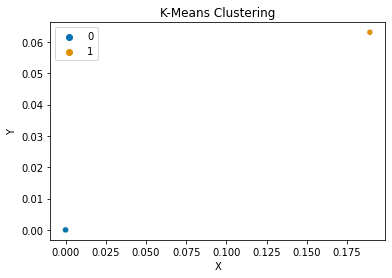

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.sparse import csr_matrix

# generate some random sparse data

X_sparse = csr_matrix(X)

# perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=40)
kmeans.fit(X_sparse)

# get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# convert sparse matrix to dense matrix
X_dense = X_sparse.toarray()

# create Seaborn scatter plot
sns.scatterplot(x=X_dense[:, 0], y=X_dense[:, 1], hue=labels, palette='colorblind')

# set plot title and axis labels
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')

# display plot
plt.show()


<__array_function__ internals>:180: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
<__array_function__ internals>:180: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.


TypeError: ignored

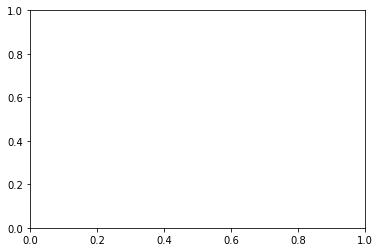

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix

# get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

X= csr_matrix(X)

# create a Seaborn scatter plot
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='colorblind', s=100)

# add cluster centers to the plot
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], marker='x', color='r', s=200, linewidths=3)

# set plot title and axis labels
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')

# display plot
plt.show()


## Visualisation : using visualisation techniques related to NLP, such as word clouds or network graphs, to represent the results of the analysis.

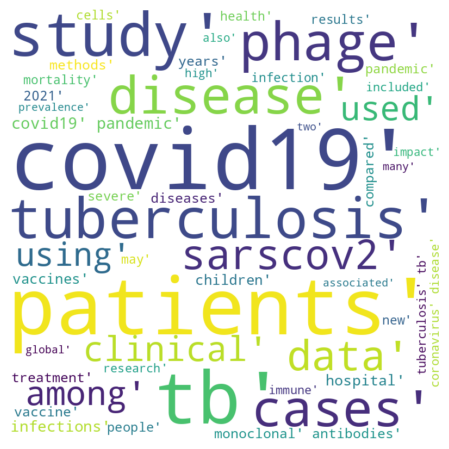

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the filtered_abstracts into a single string
my_list = str(filtered_abstracts)[1:-1]

# Create a word cloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(my_list)

# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
